In [310]:
#Question No.2 [Data:- built Decision Tree with target variable Taxable_income]
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [311]:
#Read the file
fraudcheck= pd.read_csv('Fraud_check.csv') 
fraudcheck 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [312]:
fraudcheck.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [313]:
fraudcheck.describe() 

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [314]:
#Rename the column
fraudcheck=fraudcheck.rename({"Taxable.Income":"Taxable_income"},axis=1)
fraudcheck 

,Undergrad,Marital.Status,Taxable_income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [315]:
pd.set_option("display.max_rows", None) 
fraudcheck 

,Undergrad,Marital.Status,Taxable_income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [316]:
#Convert data type from continuous into categorical data type by using some condition & applying (cut) function & creating new column[Taxable_income1]
#Taxable_income<30000 = Risky
#Taxable_income>30000 = Good
category=pd.cut(fraudcheck.Taxable_income,bins=[10003,30000,99619],labels=['Risky','Good'])
fraudcheck.insert(6,'Taxable_income1',category) 
fraudcheck 

,Undergrad,Marital.Status,Taxable_income,City.Population,Work.Experience,Urban,Taxable_income1
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [317]:
#Drop the column which is not necessary for the futher procedure of DT use only sales criteria for classifying it
fraudcheck=fraudcheck.drop(['Taxable_income'],axis=1)
fraudcheck

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_income1
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
5,NO,Divorced,116382,0,NO,Good
6,NO,Divorced,80890,8,YES,Good
7,YES,Single,131253,3,YES,Good
8,NO,Single,102481,12,YES,Good
9,YES,Divorced,155482,4,YES,Good


In [318]:
#Rename the column
fraudcheck=fraudcheck.rename({"Taxable_income1":"Taxable_income","Marital.Status":"Marital_status","Work.Experience":"Work_experience","City.Population":"City_population"},axis=1)
fraudcheck  

,Undergrad,Marital_status,City_population,Work_experience,Urban,Taxable_income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
5,NO,Divorced,116382,0,NO,Good
6,NO,Divorced,80890,8,YES,Good
7,YES,Single,131253,3,YES,Good
8,NO,Single,102481,12,YES,Good
9,YES,Divorced,155482,4,YES,Good


In [319]:
#Covert the categorical data into numbers 
fraudcheck[['Taxable_income','Marital_status','Undergrad','Urban']]=fraudcheck[['Taxable_income','Marital_status','Undergrad','Urban']].apply(lambda x: pd.factorize(x)[0])
fraudcheck[['Taxable_income','Marital_status','Undergrad','Urban']]

,Taxable_income,Marital_status,Undergrad,Urban
0,0,0,0,0
1,0,1,1,0
2,0,2,0,0
3,0,0,1,0
4,0,2,0,1
5,0,1,0,1
6,0,1,0,0
7,0,0,1,0
8,0,0,0,0
9,0,1,1,0


In [320]:
x=fraudcheck.iloc[:,0:5]
y=fraudcheck['Taxable_income']

In [321]:
pd.set_option("display.max_rows", None) 
x 

,Undergrad,Marital_status,City_population,Work_experience,Urban
0,0,0,50047,10,0
1,1,1,134075,18,0
2,0,2,160205,30,0
3,1,0,193264,15,0
4,0,2,27533,28,1
5,0,1,116382,0,1
6,0,1,80890,8,0
7,1,0,131253,3,0
8,0,0,102481,12,0
9,1,1,155482,4,0


In [322]:
y 

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     1
11     0
12     1
13     0
14     0
15     0
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     1
29     0
30     0
31     0
32     0
33     0
34     1
35     0
36     1
37     0
38     1
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     1
49     0
50     0
51     0
52     0
53     1
54     0
55     1
56     0
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     0
66     0
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     1
80     0
81     0
82     0
83     0
84     0
85     1
86     0
87     1
88     0
89     1
90     0
91     0
92     0
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    0
109    0
110    1
1

In [323]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [324]:
#Building Decision Tree classifier using entropy criteria whichever feature reduced the entropy or confusion by max. extent & gives more clarity of information information

In [325]:
#max.depth= pruning of decision tree means cutting down the decision tree to prevent model from overfitting
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

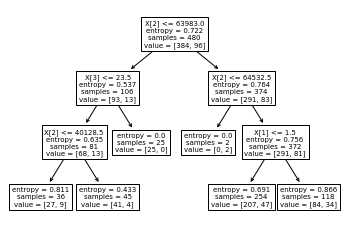

In [326]:
#PLot the decision tree
tree.plot_tree(model); 

In [327]:
fn=['Undergrad','Marital_status','City_population','Work_experience','Urban']
fn 

['Undergrad', 'Marital_status', 'City_population', 'Work_experience', 'Urban']

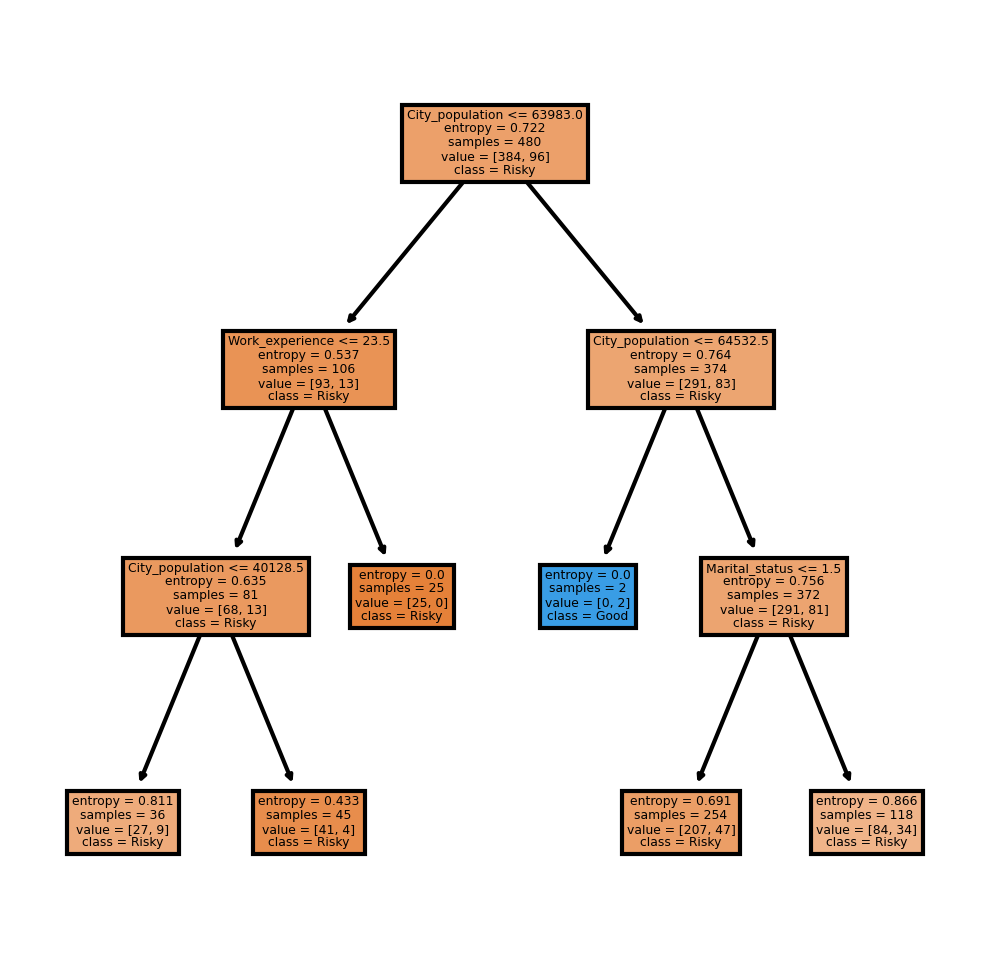

In [328]:
#Above tree plot having notation x1, x2, x3, x4 ie; independent variables notation like x1= Undergrad, x2= Marital_status, x3= City_population, x4= Work_experience & x5= Urban 
fn=['Undergrad','Marital_status','City_population','Work_experience','Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [329]:
#Identify the important feature based on entropy value whichever feature is capable to reduce the confusion by max. extent that features can be called as root node
model.feature_importances_ 

array([0.        , 0.17443688, 0.55523026, 0.27033287, 0.        ])

In [330]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

City_population    0.555230
Work_experience    0.270333
Marital_status     0.174437
Undergrad          0.000000
Urban              0.000000
dtype: float64

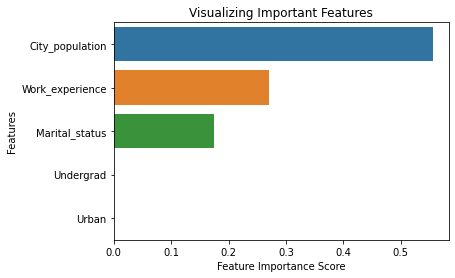

In [331]:
# Creating a bar plot on X-axis= entropy value & Y-axis= independent variables
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [332]:
#Predicting on test data 
preds = model.predict(x_test)
# getting the count of each category 
pd.Series(preds).value_counts()   

0    120
dtype: int64

In [333]:
preds 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [334]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds) 

col_0,0
Taxable_income,
-1,1
0,92
1,27


In [335]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

In [336]:
#Building Decision Tree classifier[CART] using Gini Impurity criteria whichever feature reduced the Gini Impurity or residual sum square value by max. extent then this feature called as root node

In [337]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [338]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [339]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test) 

0.7666666666666667

In [340]:
model_gini.feature_importances_ 

array([0.        , 0.20034653, 0.75212072, 0.        , 0.04753275])

In [341]:
#Decision tree regression [when we apply regression model first we should ensure that our target variable is continuous or not]
from sklearn.tree import DecisionTreeRegressor 

In [342]:
#Read the file
fraudcheck= pd.read_csv('Fraud_check.csv') 
fraudcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [343]:
#Rename the column
fraudcheck=fraudcheck.rename({"Taxable.Income":"Taxable_income","Marital.Status":"Marital_status","Work.Experience":"Work_experience","City.Population":"City_population"},axis=1)
fraudcheck  

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [344]:
#Covert the categorical data into numbers or object to integers
fraudcheck[['Marital_status','Undergrad','Urban']]=fraudcheck[['Marital_status','Undergrad','Urban']].apply(lambda x: pd.factorize(x)[0])
fraudcheck[['Marital_status','Undergrad','Urban']]

,Marital_status,Undergrad,Urban
0,0,0,0
1,1,1,0
2,2,0,0
3,0,1,0
4,2,0,1
5,1,0,1
6,1,0,0
7,0,1,0
8,0,0,0
9,1,1,0


In [345]:
#Reset the index of column for convenient further work
fraudcheck = fraudcheck.reindex(['Undergrad','Marital_status','City_population','Work_experience','Urban','Taxable_income'], axis=1)
fraudcheck 

,Undergrad,Marital_status,City_population,Work_experience,Urban,Taxable_income
0,0,0,50047,10,0,68833
1,1,1,134075,18,0,33700
2,0,2,160205,30,0,36925
3,1,0,193264,15,0,50190
4,0,2,27533,28,1,81002
5,0,1,116382,0,1,33329
6,0,1,80890,8,0,83357
7,1,0,131253,3,0,62774
8,0,0,102481,12,0,83519
9,1,1,155482,4,0,98152


In [346]:
#when we apply regression model first we should ensure that our target variable is continuous or not
array = fraudcheck.values
X = array[:,0:4]
y = array[:, 5] 

In [347]:
x 

,Undergrad,Marital_status,City_population,Work_experience,Urban
0,0,0,50047,10,0
1,1,1,134075,18,0
2,0,2,160205,30,0
3,1,0,193264,15,0
4,0,2,27533,28,1
5,0,1,116382,0,1
6,0,1,80890,8,0
7,1,0,131253,3,0
8,0,0,102481,12,0
9,1,1,155482,4,0


In [348]:
y 

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [350]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train) 

DecisionTreeRegressor()

In [351]:
#Find the accuracy
model.score(X_test,y_test) 

-1.1927567434159259